<a href="https://colab.research.google.com/github/greapis/jaeha-shim/blob/main/Building_vision_model_by_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **학습할 내용**


의류 기사를 인식하도록 신경망 학습시키기


네트워크의 다양한 레이어를 실험하는 과정을 안내하는 일련의 연습을 완료합니다.

## **빌드할 항목**

의류 물품을 식별하는 신경망

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


tf.keras.datasets MAPI에서는 Fashion MNIST 데이터를 제공합니다. 다음과 같이 로드합니다.

In [2]:
mnist = tf.keras.datasets.fashion_mnist

이 객체에서 load_data를 호출하면 두 가지 목록 모음인 학습 값과 테스트 값(의류 항목과 라벨을 표시하는 그래픽을 나타냄)을 제공합니다.

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


각 값의 모양 학습 이미지와 학습 라벨을 인쇄하여 확인합니다. 배열에서 다양한 색인을 실험해 볼 수 있습니다.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

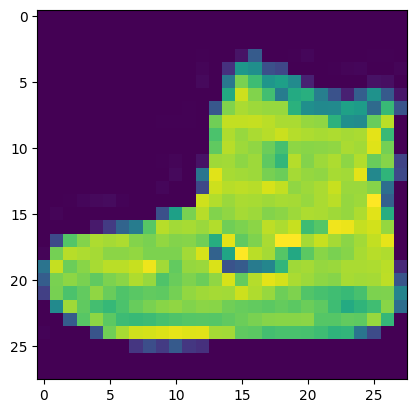

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

모든 값은 0~255의 정수인 것을 알 수 있습니다. 신경망을 학습시킬 때 모든 값을 0과 1 사이의 값으로 쉽게 처리하는 정규화라고 합니다. 다행히 Python은 반복 없이 이러한 목록을 정규화하는 쉬운 방법을 제공합니다.

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

색인 0의 부팅과 다른 부팅인 42를 살펴보는 것도 좋습니다.

이제 학습과 테스트라는 두 가지 데이터 세트가 있는 이유가 궁금할 수 있습니다.

모델을 아직 분류하지 못했을 때와 학습용으로 아직 다른 데이터 세트를 사용하여 분류가 얼마나 잘 되었는지 확인할 수 있습니다. 실제로 완료되면 다시 보지 못했던 데이터로 모델을 사용하고 싶을 것입니다. 또한 별도의 테스트 데이터가 없으면 네트워크에서 지식을 일반화하지 않고 학습 데이터만 기억할 위험이 있습니다.

**3. 모델 설계**


이제 모델을 디자인합니다. 3개의 레이어가 있습니다. 하나씩 살펴보고 다양한 유형의 레이어와 각 레이어에 사용되는 매개변수를 살펴봅니다.

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



*   Sequential은 신경망의 레이어 시퀀스를 정의합니다.
*   Flatten는 정사각형을 사용하여 1차원 벡터로 변환합니다


*   Dense은 뉴런의 레이어를 추가합니다.
*   Activation 함수는 각 뉴런 레이어에 해야 할 일을 알려줍니다. 많은 옵션이 있지만 지금은 다음을 사용하세요.


*   Relu가 X가 0보다 큰 경우 X를 반환하고 그렇지 않으면 0을 반환한다는 의미입니다. 0 이상의 값만 네트워크의 다음 레이어로 전달됩니다.
*   Softmax는 일련의 값을 사용하여 가장 큰 값을 선택합니다. 예를 들어 마지막 레이어의 출력이 [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]와 같이 표시되면 가장 큰 값을 정렬하지 않아도 되므로 [0,0,0,0,1,0,0,0]0을 반환합니다.







**4. 모델 컴파일 및 학습**

모델이 정의되었으므로 다음으로 빌드해야 할 작업입니다. 먼저 optimizer 및 loss 함수로 모델을 컴파일한 다음 학습 데이터 및 라벨로 모델을 학습시키세요. 목표는 학습 데이터와 학습 라벨 간의 관계를 모델이 찾아내도록 하는 것입니다. 나중에 모델에서 학습 데이터와 유사한 데이터를 확인한 후 데이터가 어떻게 표시될지 예측해 봅니다.

metrics=를 매개변수로 사용하면 TensorFlow에서 예측된 결과를 알려진 답변 (라벨)과 비교하여 학습의 정확성을 보고할 수 있습니다.

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.5030 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3805 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3409 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3162 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2962 - accuracy: 0.8905


model.fit을 실행하면 손실 및 정확성이 표시됩니다.

모델 학습이 완료되면 마지막 에포크가 끝나면 정확도 값이 표시됩니다. 위와 같이 0.8926과 같이 표시될 수 있습니다. 이렇게 하면 신경망이 학습 데이터를 분류하는 데 약 89% 정확합니다. 즉, 이미지와 패턴의 89% 가 일치하는 패턴을 찾았습니다. 좋지는 않지만 5에포크 동안만 학습하고 빠르게 완료했다는 점을 감안하면 나쁘지 않습니다.

**5. 모델 테스트**


모델이 본 적이 없는 데이터에 대해 어떤 성능을 보일까요? 테스트 모음이 필요한 이유입니다. model.evaluate를 호출하여 두 세트를 전달하면 각 집합의 손실을 보고합니다. 한번 사용해 보세요.

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8758


[0.35340285301208496, 0.8758000135421753]

6. 탐험 연습
연습 1
이 첫 번째 연습에서는 다음 코드를 실행합니다.

이 예에서는 .8789의 정확성을 반환했으며, 이는 정확성이 약 88% 임을 의미합니다. 값이 약간 다를 수 있습니다.

모델이 알 수 없는 데이터로 학습한 경우만큼 정확하지 않습니다. TensorFlow에 관해 자세히 알아보면서 개선 방법을 알아보겠습니다.

더 자세히 알아보려면 다음 단계의 실습을 시도해 보세요.

**6. 탐험 연습**



연습 1

이 첫 번째 연습에서는 다음 코드를 실행합니다.

In [9]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[2.7703312e-05 6.1701300e-08 1.2112720e-06 1.2980078e-06 3.8950911e-06
 3.2061398e-02 7.6159951e-05 1.8998256e-02 2.9019755e-05 9.4880098e-01]


각 테스트 이미지에 대한 분류 집합을 만든 다음 분류의 첫 번째 항목을 출력합니다. 실행 후의 결과는 숫자 목록입니다. 이러한 수치가 무엇이라고 생각하나요? 이러한 수치는 무엇을 의미하나요?

print(test_labels[0])을 실행하면 9가 나옵니다. 목록이 이렇게 보이는 이유를 이해하는 데 도움이 되나요?


모델의 출력은 10개의 숫자 목록입니다. 분류되는 값이 해당 라벨일 확률입니다. 예를 들어 목록의 첫 번째 값은 의류가 클래스 0이고 다음 값이 1일 확률입니다. 이 중 한 가지를 제외하면 모두 확률은 매우 낮습니다. 또한 Softmax로 인해 목록의 모든 확률은 1.0이 됩니다.


목록과 라벨은 0을 기반으로 하므로 발목 부츠 9는 라벨 10개의 10번째임을 나타냅니다. 목록에서 10번째 요소가 가장 높은 것은 신경망에서 분류한 항목이 앵클 부츠일 가능성이 높다는 것을 예측했다는 의미입니다.

**Refrence : "softmax" by bing search**


Here's the docs: https://www.tensorflow.org/api_docs/python/tf/nn/softmax

Basically, softmax is good for classification. It will take any number and map it to an output of either 0 or 1 (for example) because we say that if Softmax(X) <0.5 then set it equal to zero and if Softmax(X)>=0.5 then set it equal to 1.

**연습 2**



모델의 레이어를 확인합니다. 512개의 뉴런이 있는 밀집 레이어의 다양한 값을 실험합니다.

손실 및 학습 시간에 어떤 결과를 얻나요? 그렇게 생각한 이유는 무엇인가요?

예를 들어 뉴런이 1,024개로 늘어나면 더 많은 계산이 필요하기 때문에 프로세스 속도가 느려집니다. 하지만 이 경우에는 모델이 더 정확하기 때문에 결과가 효과적입니다. 그렇다고 해서 더 좋은 것은 아닙니다. 수익 감소의 법안에 매우 빨리 부딪힐 수 있습니다.

**연습 3**


Flatten() 레이어를 삭제하면 어떻게 되나요? 그렇게 생각한 이유는 무엇인가요?

데이터 모양에 대한 오류가 발생합니다. 지금은 오류의 세부정보가 모호하게 보일 수 있지만 네트워크의 첫 번째 레이어가 데이터와 같은 형태여야 한다는 점을 확실히 강조합니다. 지금은 데이터가 28x28 이미지이고 28개의 뉴런이 28개 레이어로 구현되지 않을 수 있으므로 28,28개를 784x1로 평면화하는 것이 좋습니다.

모든 코드를 작성하는 대신 앞에 Flatten() 레이어를 추가합니다. 배열은 나중에 모델에 로드되면 자동으로 평면화됩니다.

**연습 4**


최종 (출력) 레이어를 생각해보세요. 10개가 넘는 이유는 무엇인가요? 10과 다른 금액이 있다면 어떻게 될까요?

5번을 사용해 네트워크를 학습시켜 보세요. 예상치 못한 값이 발견되면 바로 오류가 표시됩니다. 또 다른 원칙으로, 마지막 레이어의 뉴런 수는 분류하는 클래스의 수와 일치해야 합니다. 이 경우 숫자 0~9의 숫자가 10개이므로 최종 레이어에는 10개의 뉴런이 있어야 합니다.

**운동 5**


네트워크에 추가 레이어가 미치는 영향을 고려합니다. 512가 있는 레이어와 10이 있는 마지막 레이어 사이에 다른 레이어를 추가하면 어떻게 되나요?

상대적으로 간단한 데이터이므로 큰 영향을 미치지 않습니다. 훨씬 더 복잡한 데이터의 경우 추가 레이어가 필요한 경우가 많습니다.

**운동 6**


학습 전에 0에서 255 사이의 값에서 0에서 1 사이의 값으로 변경하는 데이터를 정규화했습니다. 콘텐츠를 삭제하면 어떤 영향이 있을까요? 한 번 시도해 보세요. (데이터를 정규화하는 두 줄이 주석 처리되어 있습니다.)

결과가 서로 다른 이유는 무엇인가요? Stack Overflow에 좋은 답변이 있습니다.

stack Overflow URL : https://stackoverflow.com/questions/48284427/why-should-we-normalize-data-for-deep-learning-in-keras

In [15]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4717
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3613
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3225
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2973
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[2.8040133e-06 3.6011727e-08 2.8618324e-08 2.2683219e-08 6.1035834e-08
 6.0020471e-03 2.7404615e-06 4.2231135e-02 7.7824541e-07 9.5176029e-01]
9


**7. 콜백 살펴보기**


앞서 추가 에포크 동안 학습할 때 손실이 변경되는 문제가 있었습니다. 학습이 끝날 때까지 시간이 좀 걸릴 수도 있고, 95% 의 정확도 같은 원하는 값을 달성했을 때 학습을 중단시킬 수 있다면 더할 나위 없이 좋을 것입니다. 3에포크까지 도달하면 더 많은 에포크가 끝날 때까지 기다리세요.

다른 프로그램과 마찬가지로 콜백이 있습니다. 실제 사례 보기

In [17]:
import tensorflow as tf

# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.95):
#       print("\nReached 95% accuracy so cancelling training!")
#       self.model.stop_training = True

# callbacks = myCallback()
# mnist = tf.keras.datasets.fashion_mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0
# test_images=test_images/255.0
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])